In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

In [2]:
df= pd.read_csv("Shakespeare_data.csv")
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


#### Data cleaning:
A very important step in data analysis is data cleaning. By this we mean, getting rid of or suitably modifying the data which are not complete. This helps a lot in effective and correct analysis of data. 

For example, in this data set, there may be many rows/cases having repititive data. We will drop those repeating data except one.

Second, there are number of cases where one of the entries for predictors may be n/a(not available) or null. We are approaching this with two methods. First, we will replace them with the most frequent one in each column. Second, we will drop those cases. 

In some cases, if the entries are numerical values, then it is replaced by mean of the rest of data. However,  since all the entries here are categorical,  that's not possible here.

In [77]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,Henry IV,1.0,5.1.3,GLOUCESTER,ACT I
1,Henry IV,1.0,5.1.3,GLOUCESTER,SCENE I. London. The palace.
2,Henry IV,1.0,5.1.3,GLOUCESTER,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [19]:
#dropping the first column since it is same as the index column
#df = df.drop(columns="Dataline")
df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,Henry IV,1.0,5.1.3,GLOUCESTER,ACT I
1,Henry IV,1.0,5.1.3,GLOUCESTER,SCENE I. London. The palace.
2,Henry IV,1.0,5.1.3,GLOUCESTER,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [72]:
#dropping duplicates
df.drop_duplicates(inplace=True)

# Data exploration:

We are plotting some features of the data to explore more and know about the nature of the data. 

The first plot shows the distribution of Plays featured in the data in the ascending order of their occurances.

Text(0.5, 1.0, 'Bar plot')

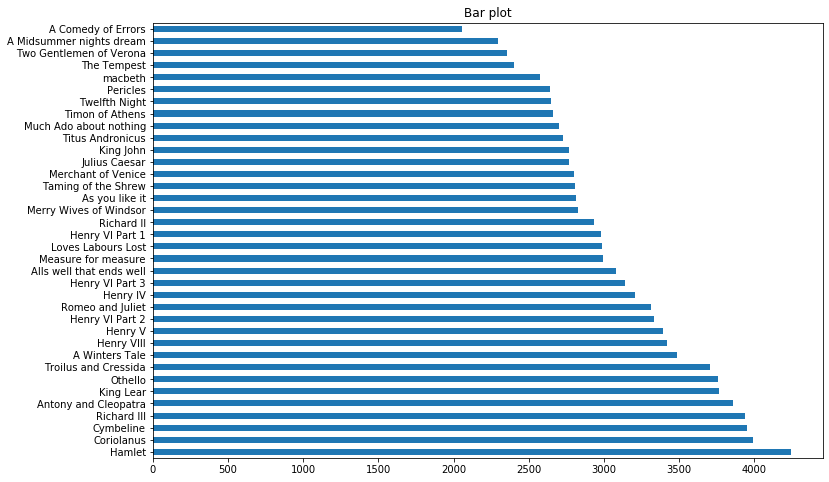

In [73]:
(df['Play']
 .value_counts(sort= True)
 #plot.figure(figsize=[10,8])
 .plot.barh(width= 0.5, figsize=[12,8])
 .set_title('Bar plot')
)

# 
We are taking a subset of data only for play "Henry-IV" and looking at the number of occurances of players in that play. we will repeat this process for all plays. This provides a cross-sectional idea of how players come into the picture. 

This can also help in setting tree model to the data, i.e. first considering the feature "Play", we will find the player using other features.


Text(0.5, 1.0, 'Bar plot')

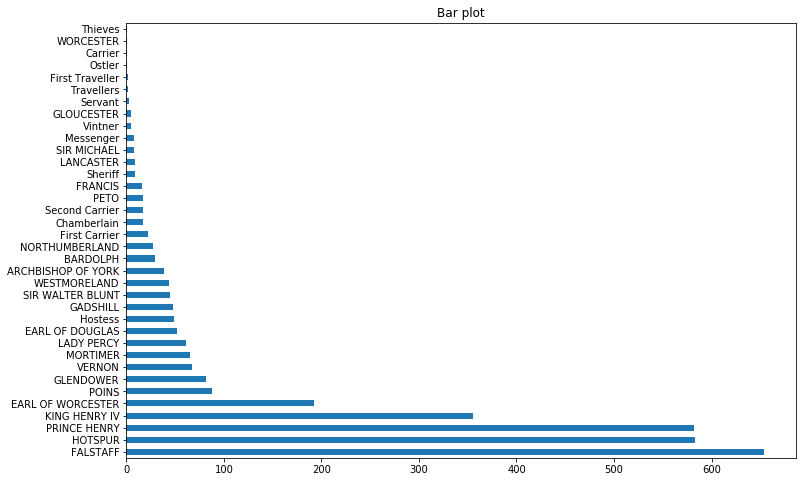

In [74]:
dfhenryIV = df[df.Play == "Henry IV"]
(dfhenryIV['Player']
 .value_counts(sort= True)
 .plot.barh(width= 0.5, figsize=[12,8])
 .set_title('Bar plot')
)

Text(0.5, 1.0, 'Bar plot')

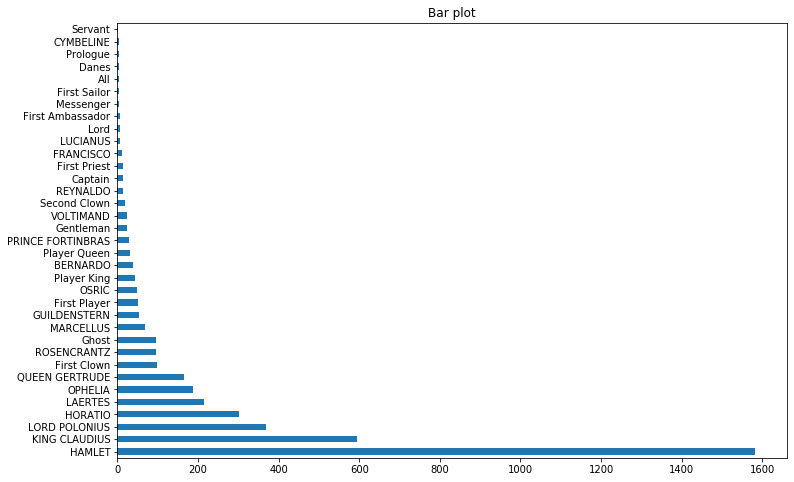

In [75]:
dfhamlet = df[df.Play == "Hamlet"]
(dfhamlet['Player']
 .value_counts(sort= True)
 .plot.barh(width= 0.5, figsize=[12,8])
 .set_title('Bar plot')
)

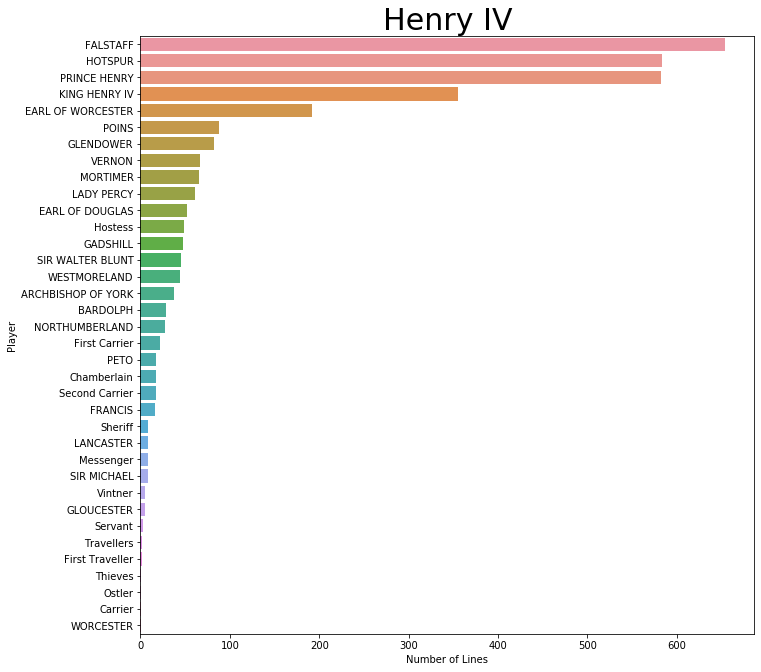

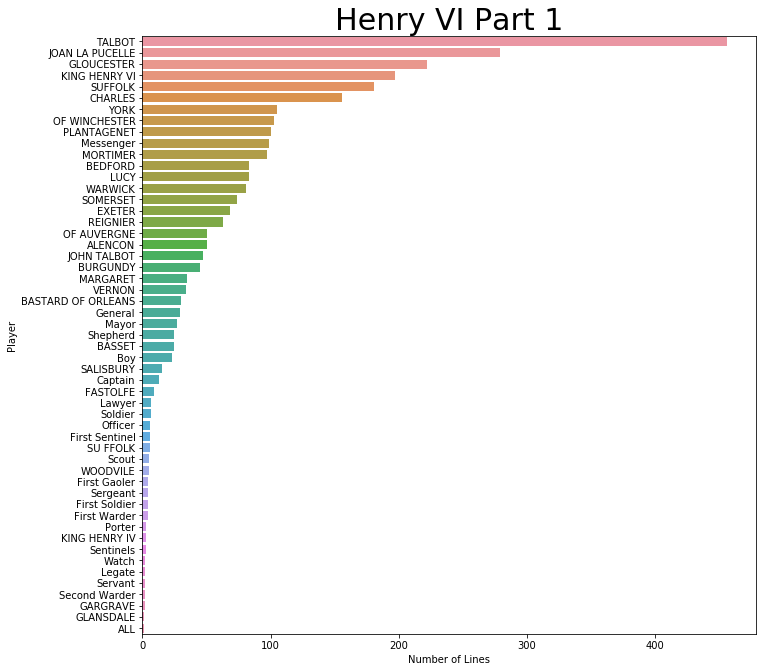

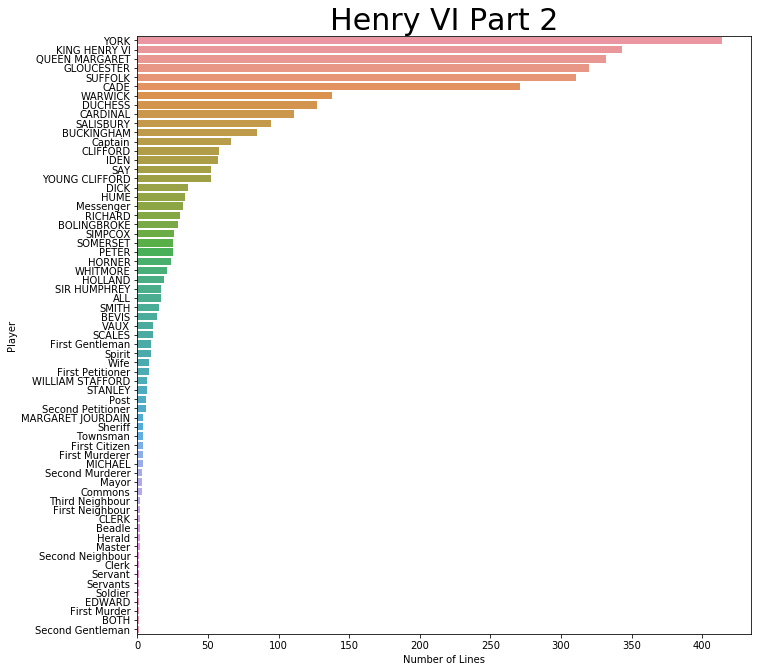

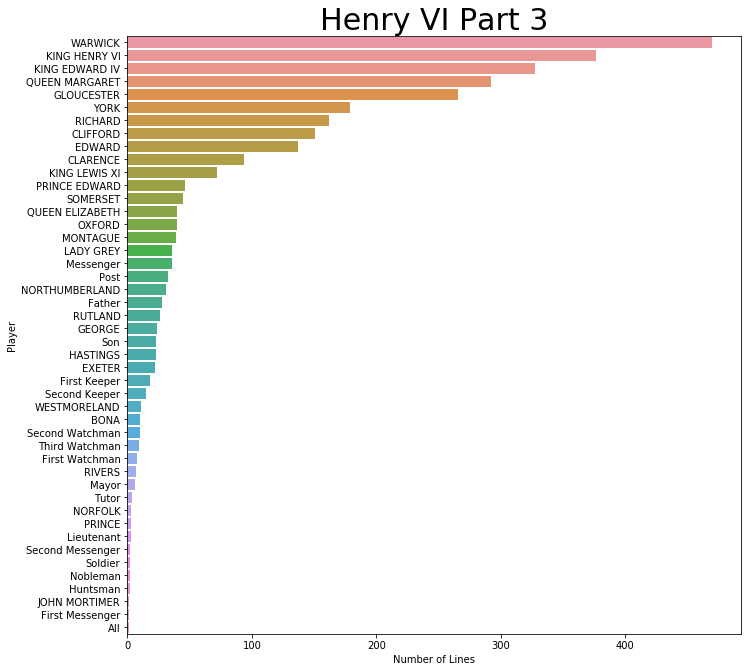

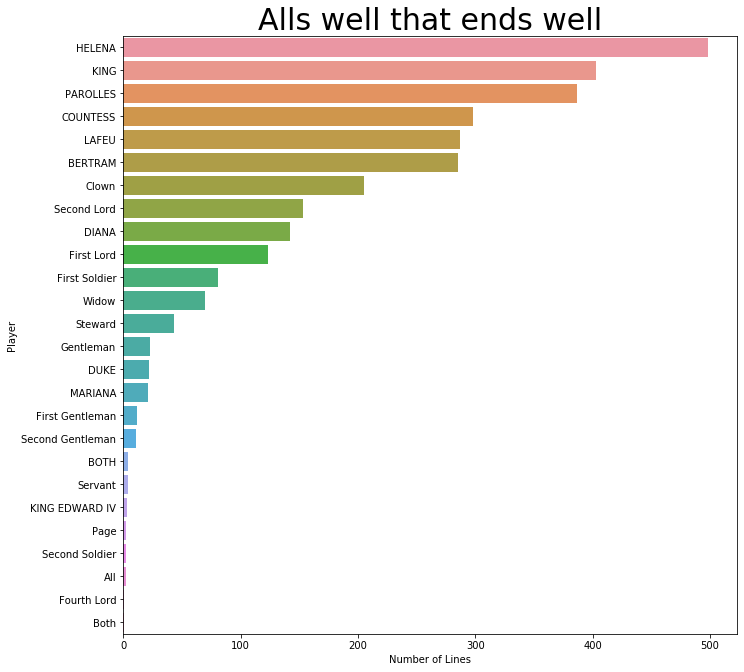

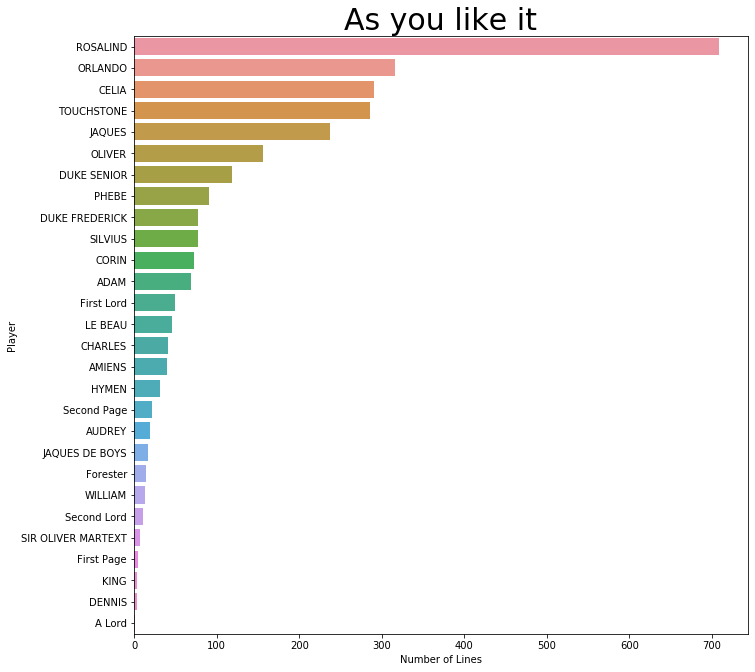

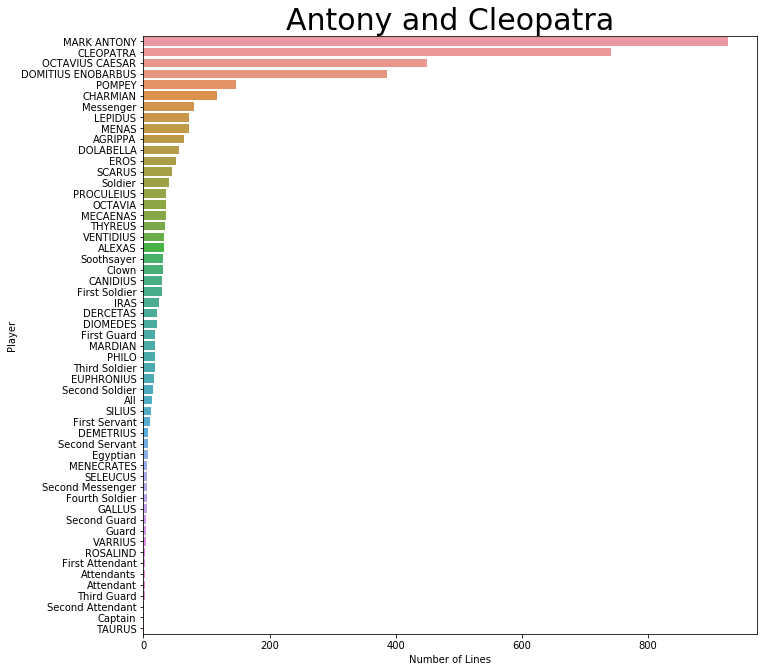

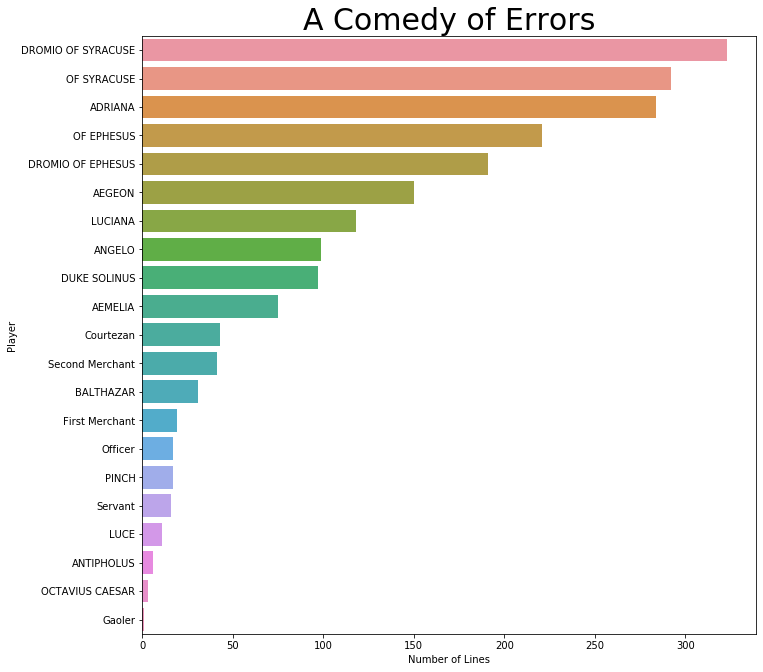

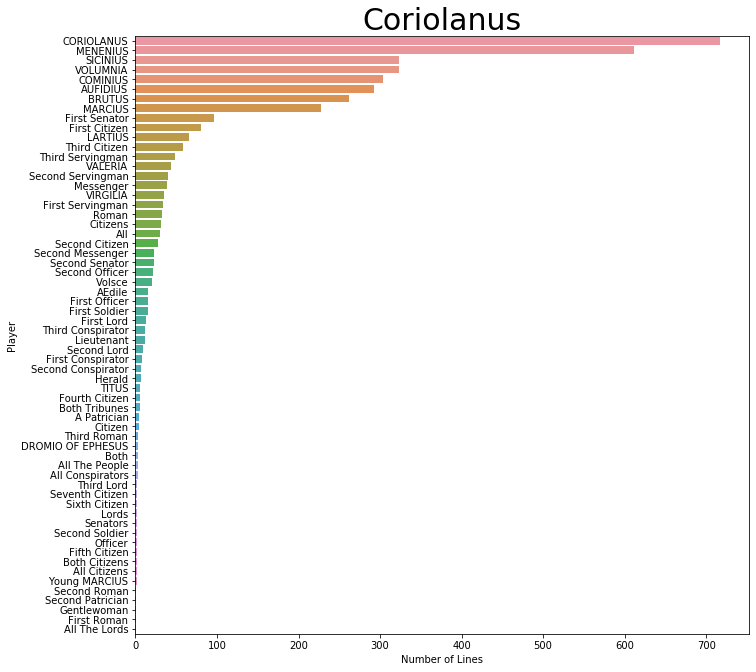

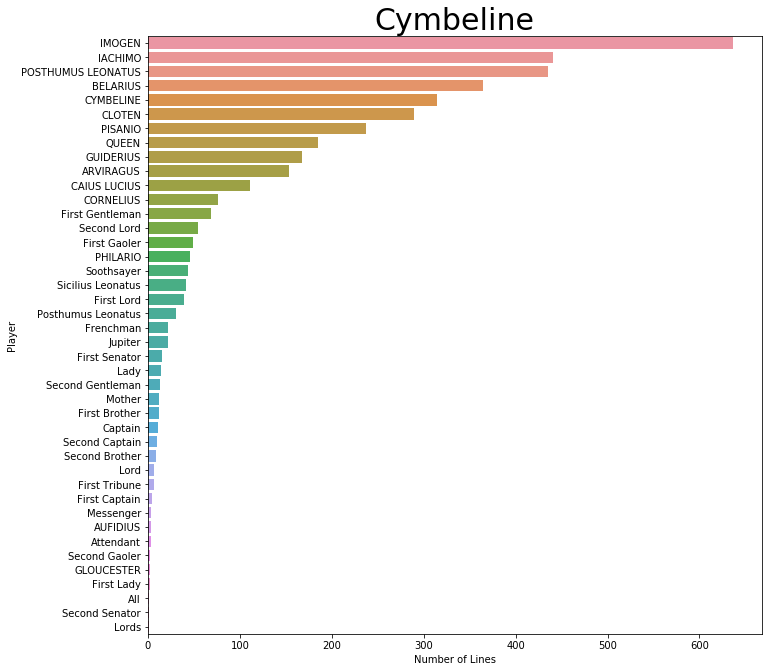

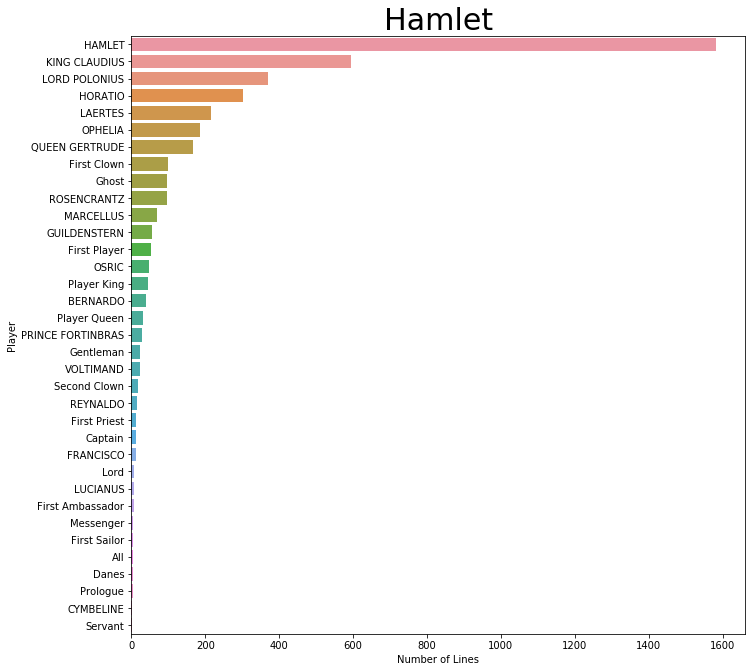

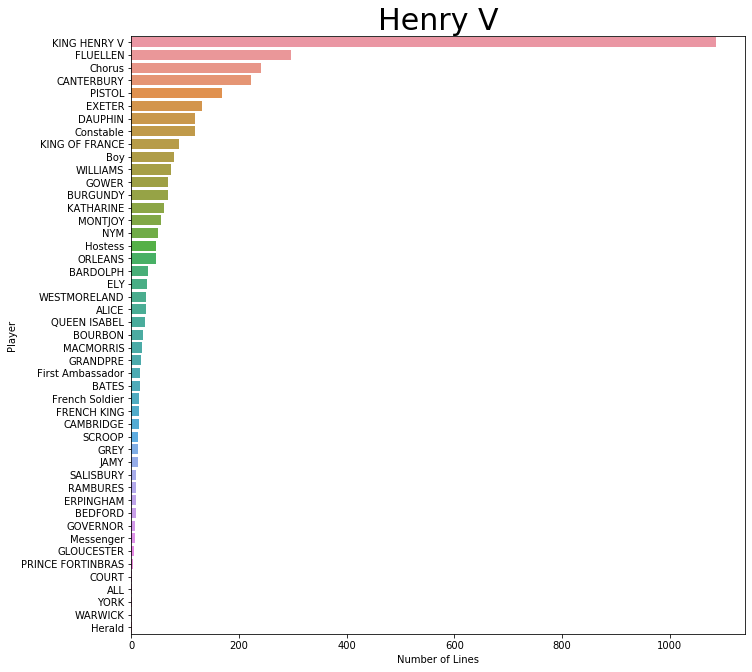

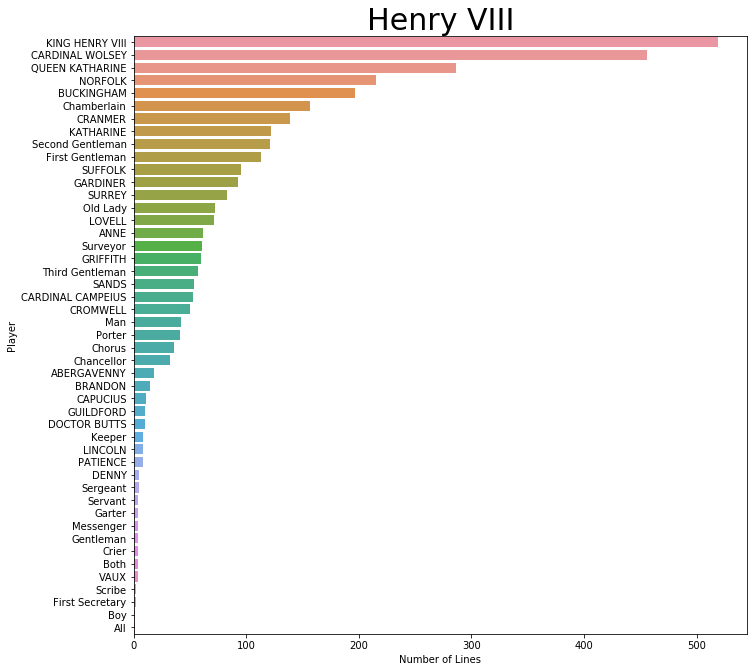

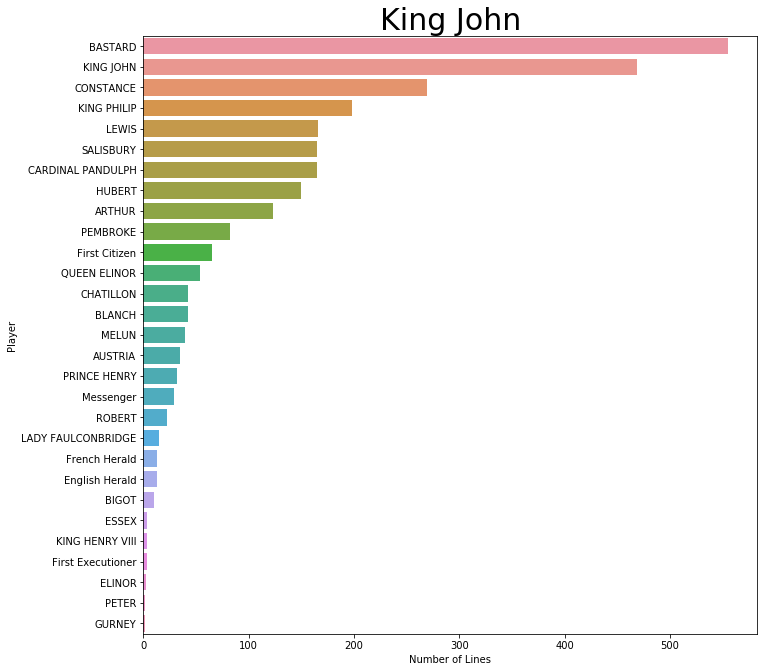

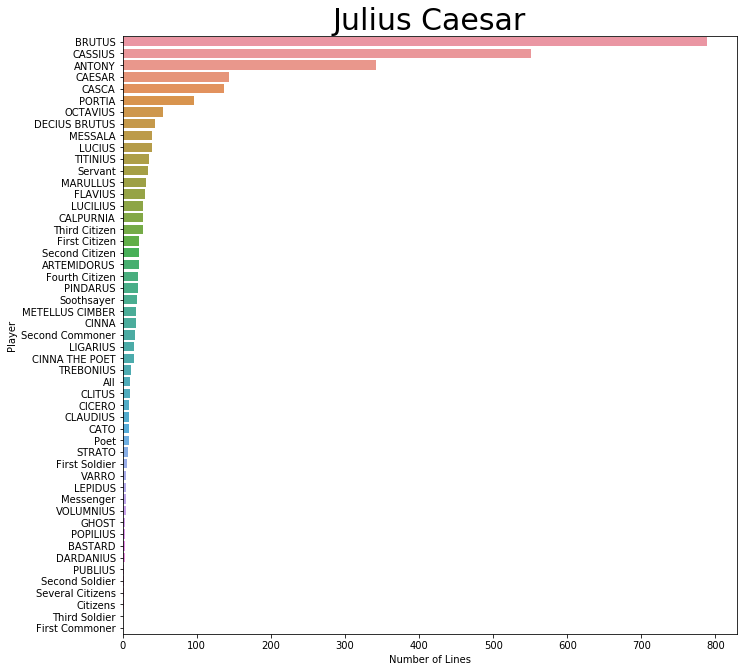

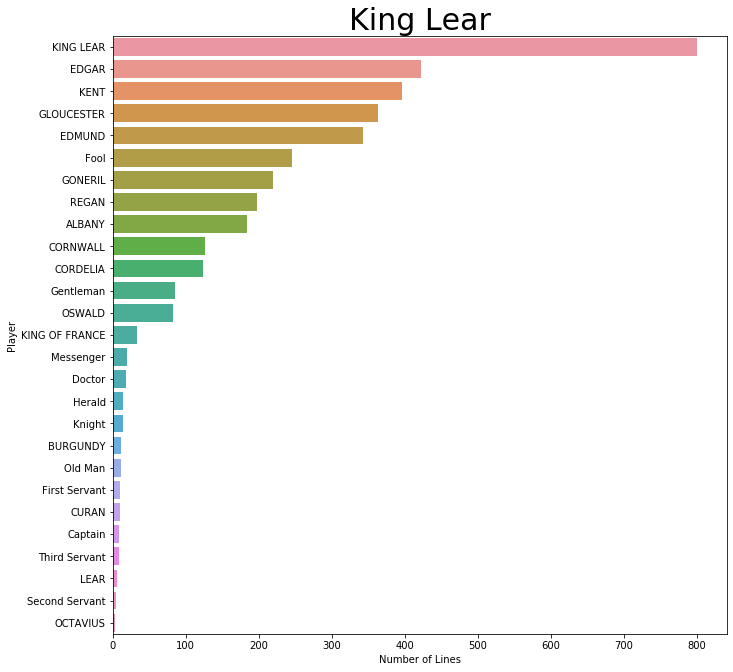

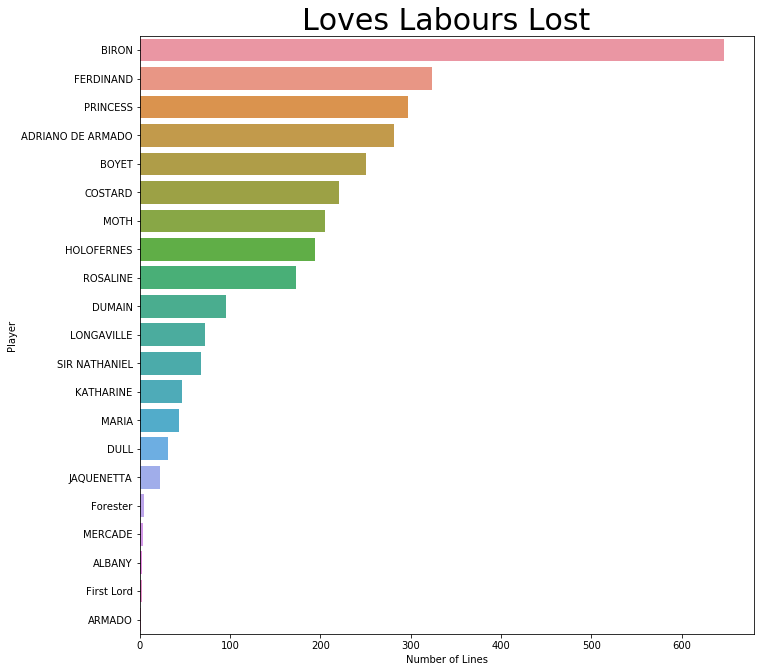

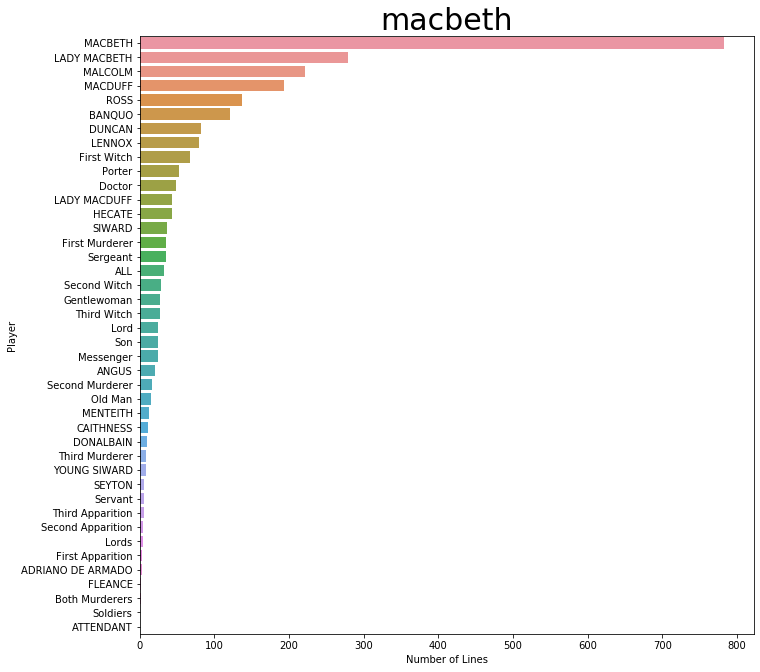

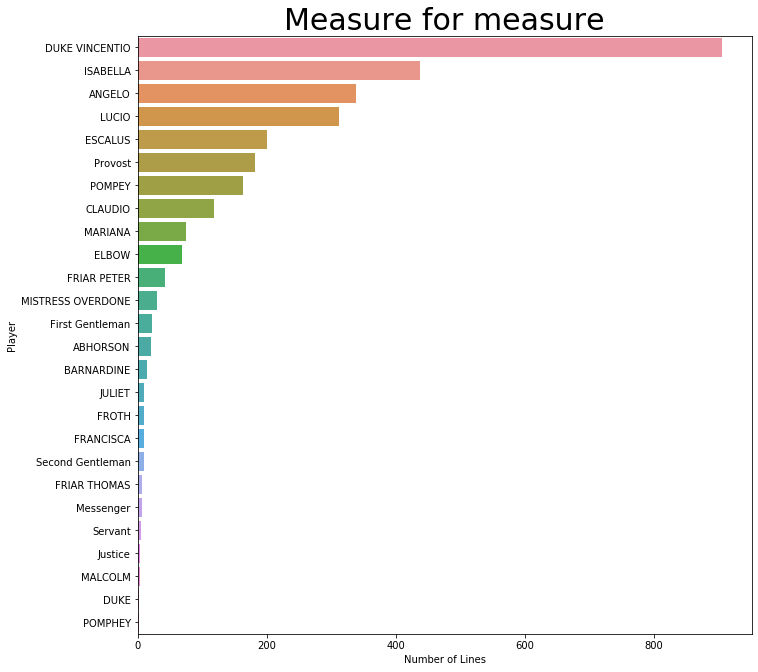

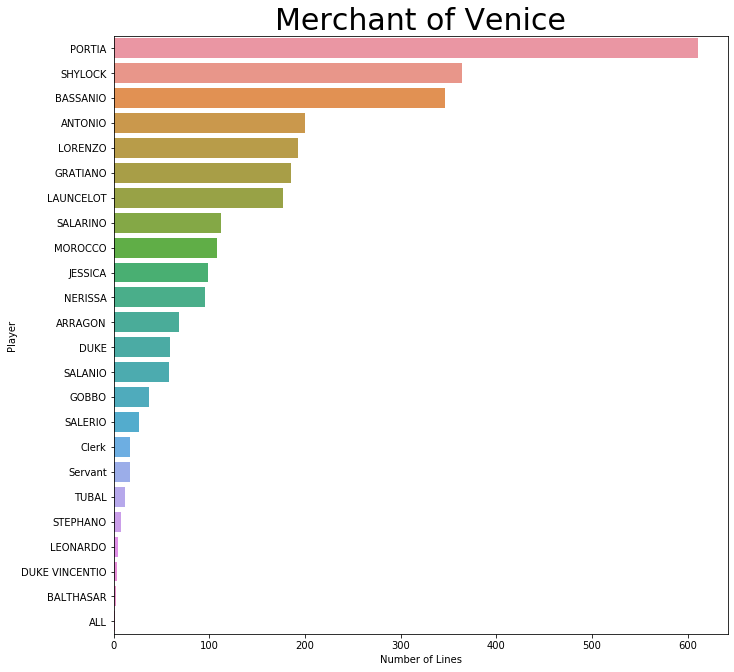

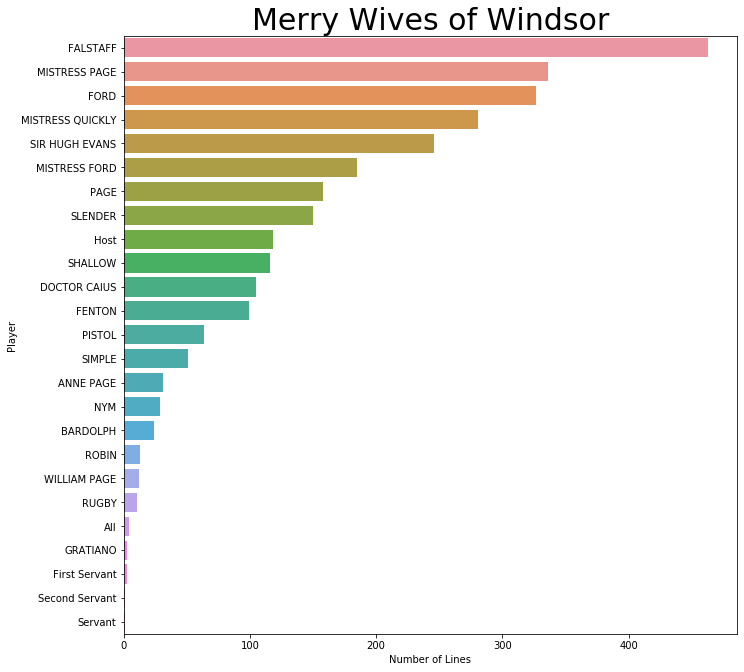

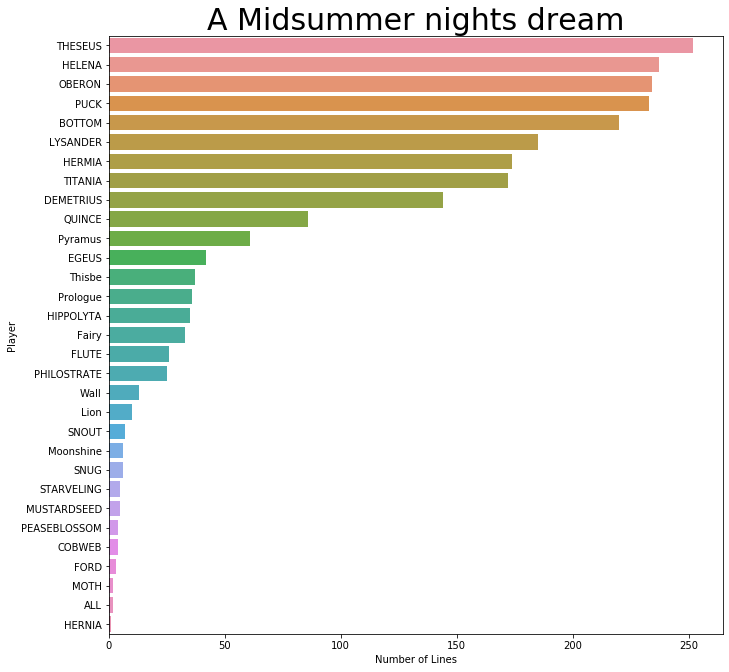

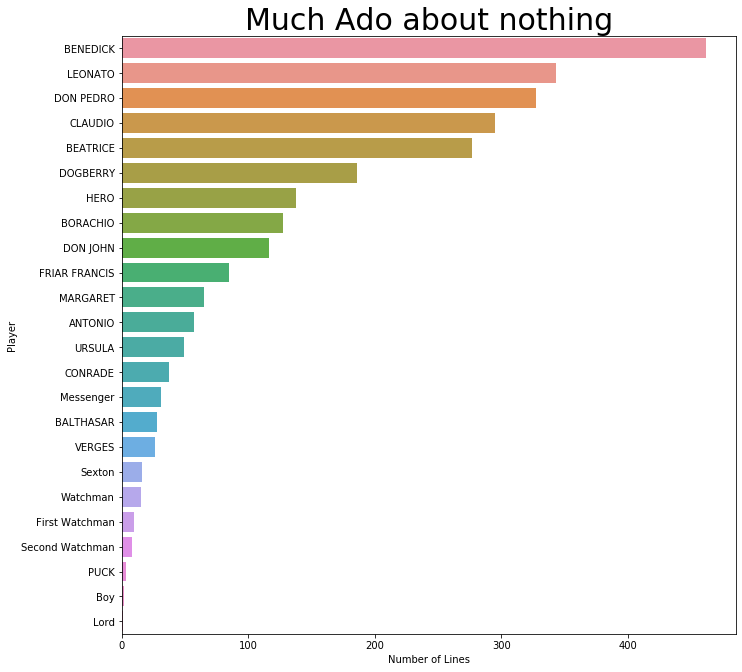

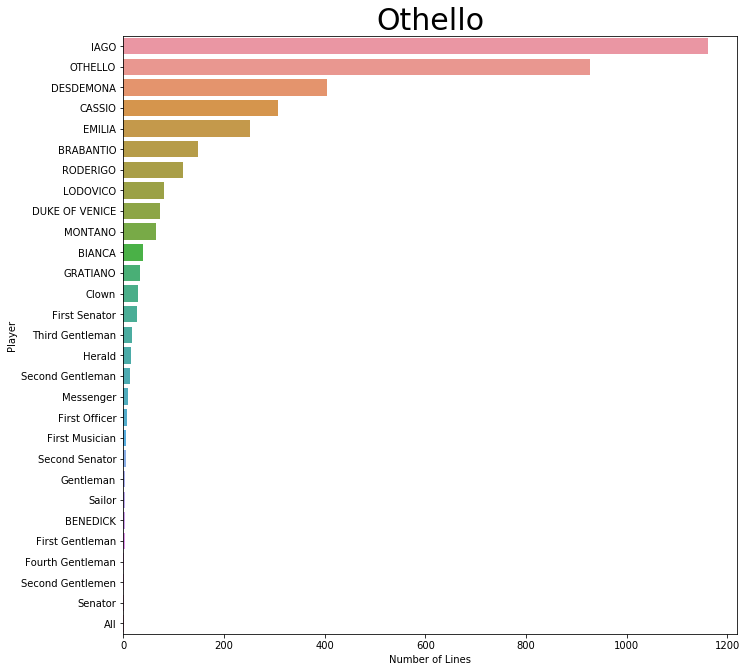

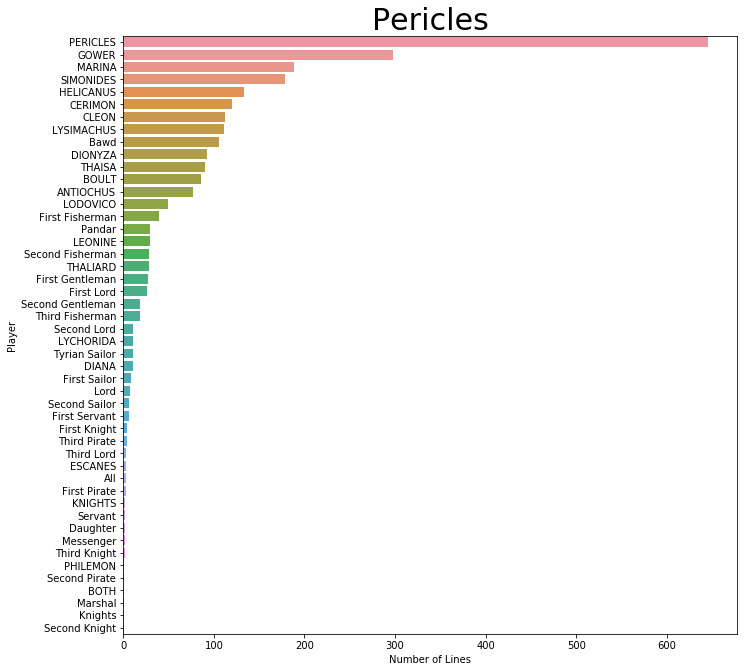

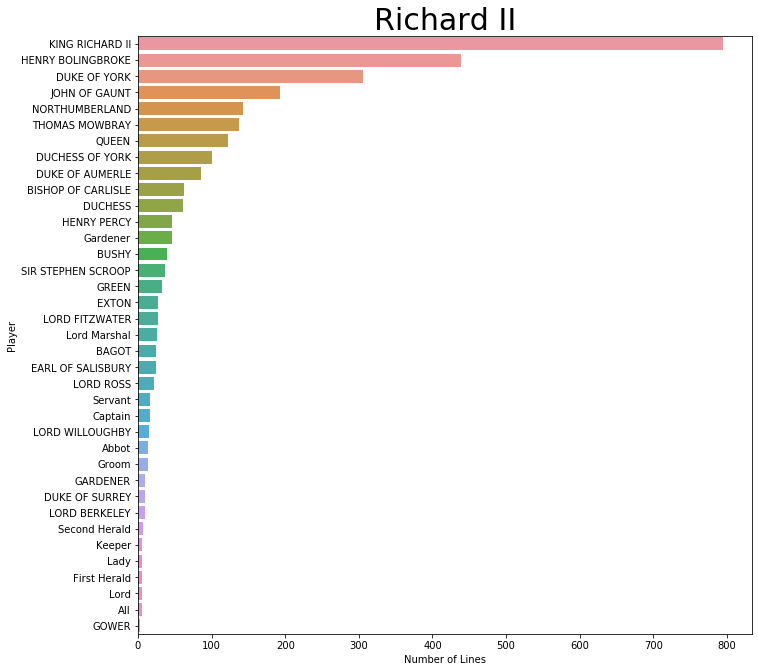

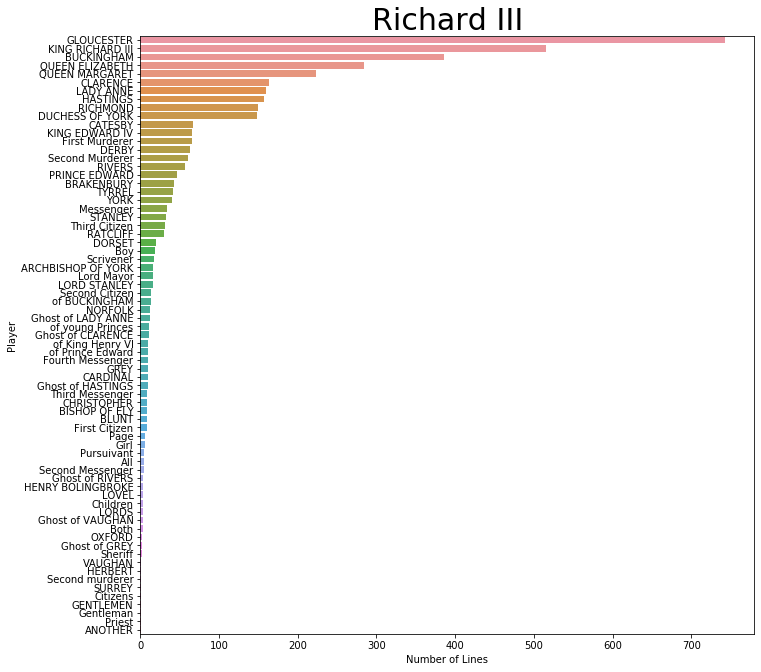

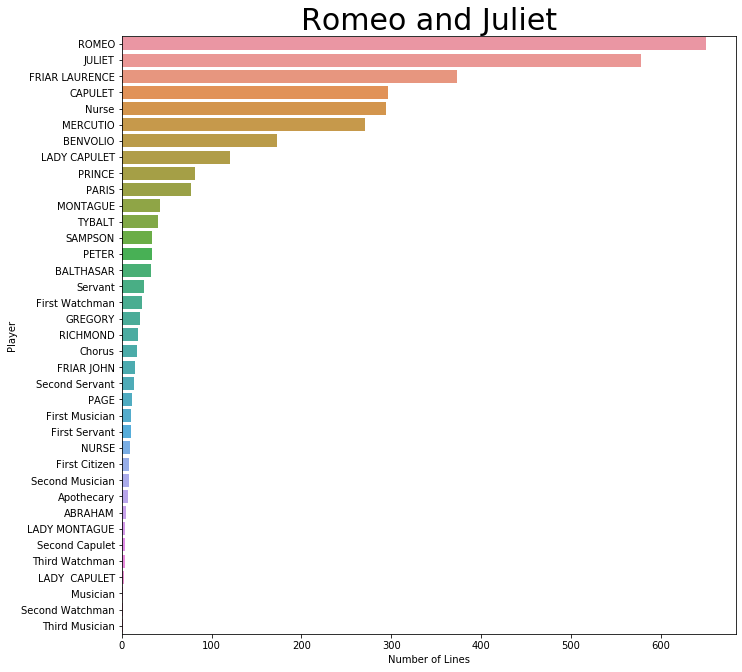

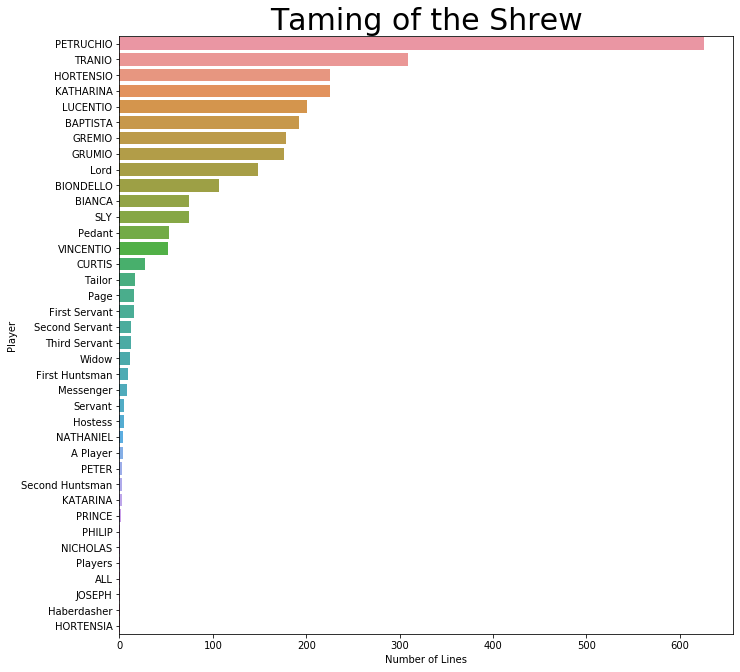

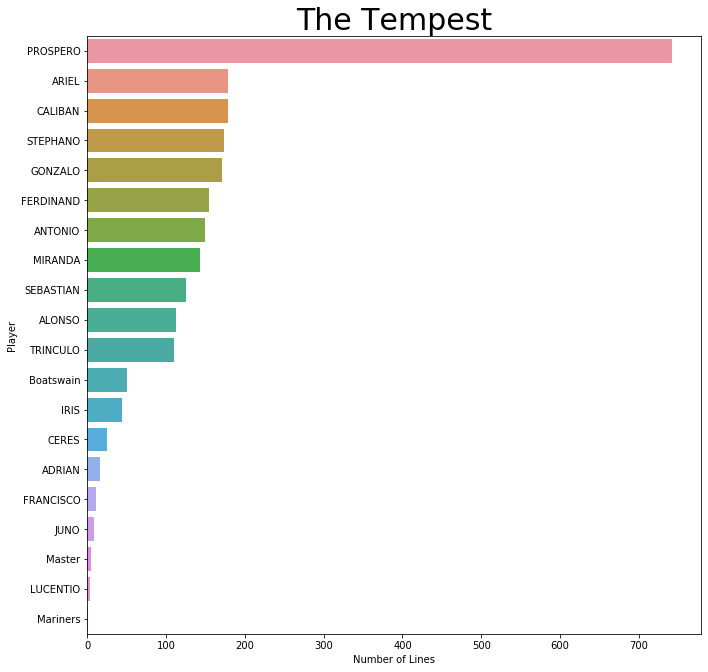

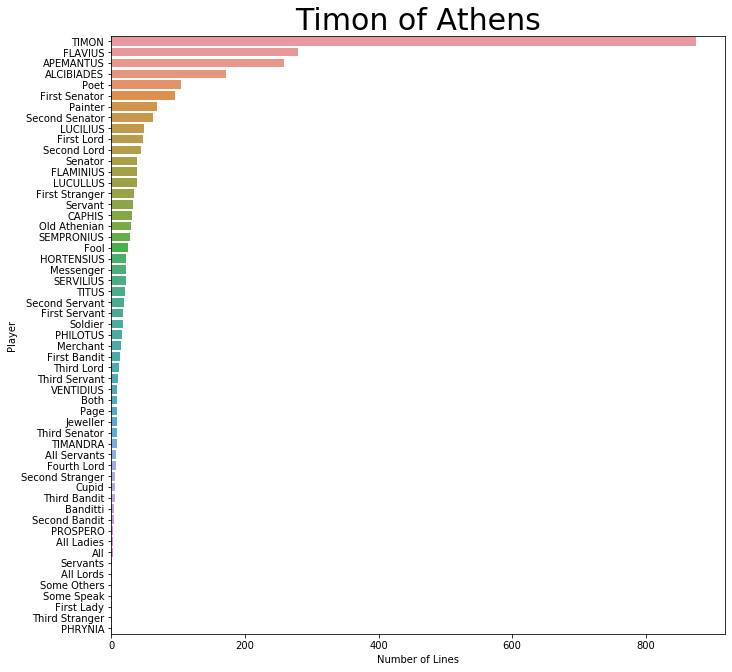

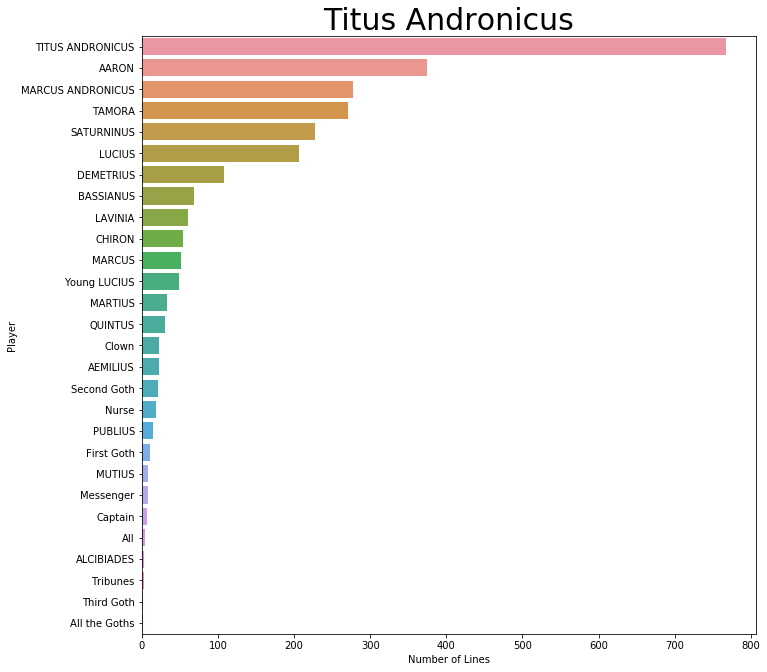

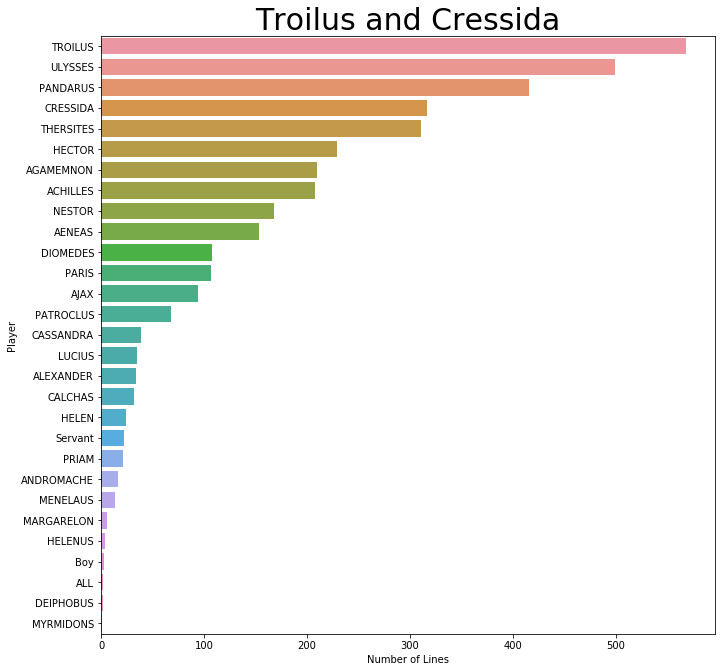

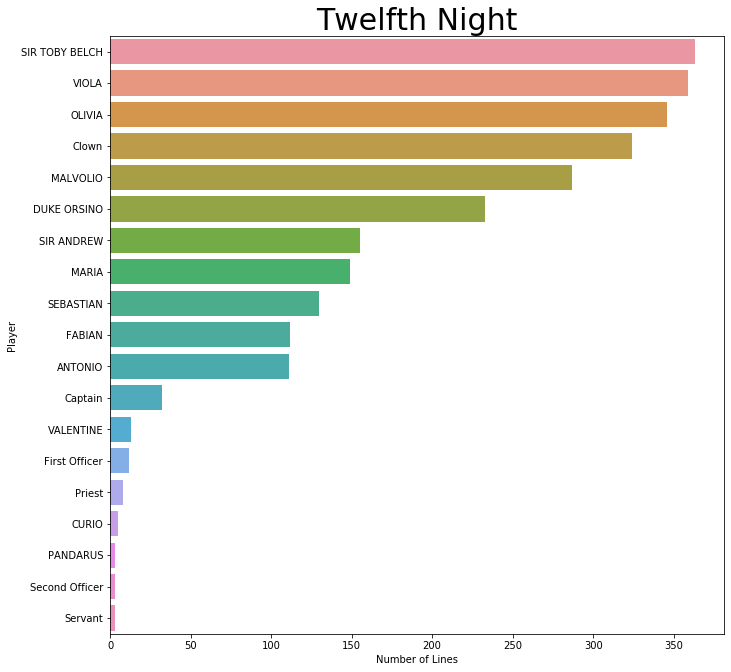

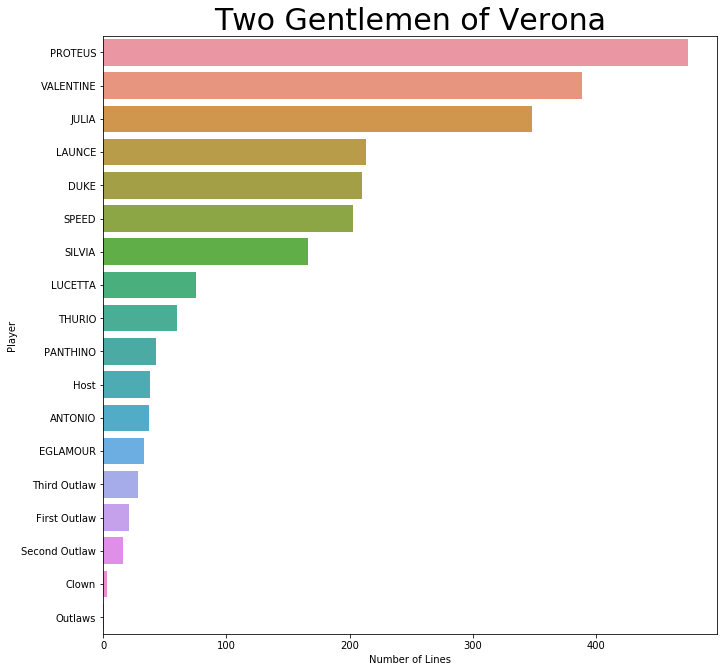

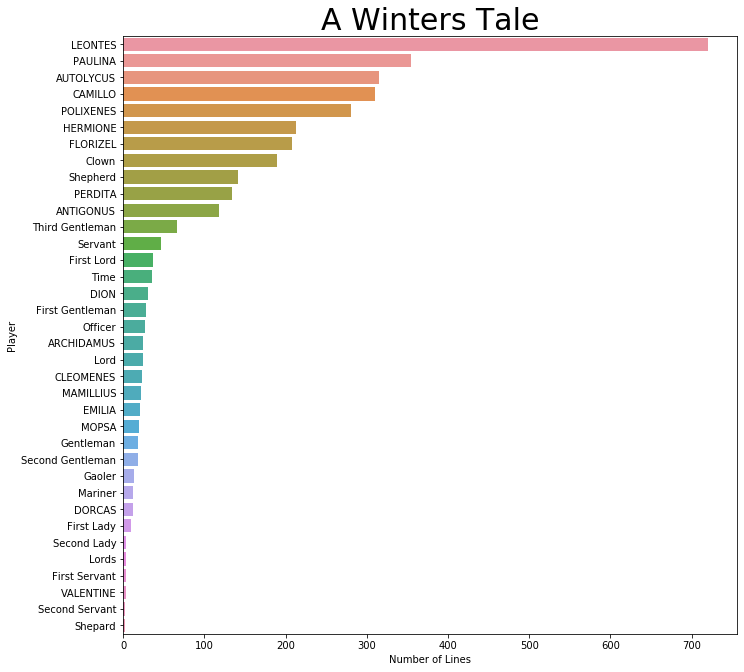

In [40]:
#This is doing the same thing as above but in a better way. I came to know about this discussing with a friend.

play_name = df['Play'].unique().tolist()
for play in play_name:
    p_line = df[df['Play']==play].groupby('Player').count().sort_values(by='PlayerLine',ascending= False)['PlayerLine']
    p_line = p_line.to_frame()
    p_line['Player'] = p_line.index.tolist()
    p_line.index = np.arange(0,len(p_line))
    p_line.columns=['Lines','Player']
    plt.figure(figsize=(11,11))
    ax= sns.barplot(x='Lines',y='Player',data=p_line)
    ax.set(xlabel='Number of Lines', ylabel='Player')
    plt.title(play,fontsize=30)
    plt.show()

# Classification:
 We will apply two classification methods here. The first one is clustering and second one is Naive Bayes classification method. 
 
 For both the methods, we will first convert the categorical entries into some numerical data. This is done by the following function.
 

In [ ]:
#converting categorical data to numericals
def convert_nonumerical(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

### Naive Bayes classification:

This uses Bayes' principle to classify future data based on past observations.


In [87]:
import pandas as pd
import sklearn as skl
from sklearn.naive_bayes import GaussianNB
import numpy as np 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

data = pd.read_csv('Shakespeare_data.csv', encoding='utf-8')
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
data.drop_duplicates(inplace=True)
data=data.drop('Dataline',axis=1)
data.dropna(inplace=True)
# The data will be split based on act scene and line here.
actsceneline=data['ActSceneLine'].str.split('.',n=-1,expand=True) 
dfn=data
dfn['act']=actsceneline[0]
dfn['scene']=actsceneline[1]
dfn['line']=actsceneline[2]
dfn['words_lines']=[len(i.split(' ')) for i in dfn['PlayerLine']]
dfn=dfn.drop(['PlayerLine','ActSceneLine'],axis=1)
from sklearn.utils import shuffle
dfm=shuffle(dfn).reset_index(drop=True)
dfm.head()

,Play,PlayerLinenumber,Player,act,scene,line,words_lines
0,Troilus and Cressida,106.0,TROILUS,5,2,168,8
1,Henry V,59.0,WILLIAMS,4,1,193,3
2,Othello,63.0,DUKE OF VENICE,1,3,314,8
3,Henry VIII,9.0,QUEEN KATHARINE,2,4,55,9
4,A Winters Tale,190.0,Clown,4,4,779,10


In [88]:
#splitting the data in to two subsets; one is training set on which the model will be trained and the second one is the test set on which the resultant model 
data_deleted=dfm.drop(['Player'],axis=1)
data_target=dfm[['Player']]
df=pd.get_dummies(dfm,columns=dfm.columns)
data_deleted=df
data_target=np.array(dfm['Player'])
data_deleted_train, data_deleted_test,data_target_train, data_target_test=train_test_split(data_deleted,data_target,test_size=0.2)

In [90]:
#Naive bayes model fit
model=MultinomialNB()
# Training NB Model with training data
model.fit(data_deleted_train,data_target_train) 

MultiPredicted=model.predict(data_deleted_test) #testing of Multinomial NB Model
ACCU_MULTI=metrics.accuracy_score(data_target_test, MultiPredicted)
print("Accuracy of Naive-Bayes is: "+str(ACCU_MULTI*100))
CONFUSION_MATRIX_MULTINB=metrics.confusion_matrix(data_target_test, MultiPredicted)
print('Confusion matrix: Naive-Bayse Classifier')
print(CONFUSION_MATRIX_MULTINB)

Accuracy of Naive-Bayes is: 83.80485949312919
Confusion matrix: Naive-Bayse Classifier
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 67 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


# Conclusion
Classification is certinly at the core of data analysis. I tried applying random forest to above dataset for classification. However, I could not succeed. It was either taking too long time or there was some bug in the code I was using. However, Naive Bayes with accuracy of more than 83% is certainly an ideal model to begin with. We could also apply clustering and SVM to this data. 

One weakness in the whole approach which I was not happy about was changing the categorical entries to numericals. It distorts the data in many cases and presents the data erroneously. We need better method to apply some of the powerful tecnquies like random forest and neural network.